# Scikit-learn

1) Look at the big picture
2) Collect/Get the Data
3) Look at the data, do some visualization and get some insights
4) Preprocess our data
5) Pick our machine learning models
6) Then train our machine learning models
7) Fine tune our machine models
8) Where we just see and present our model as a part of our application

Dataset
1) Training Data
2) Validation Data
3) Test Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
#housing = fetch_california_housing()
#pd.DataFrame(data=np.c_[housing['data'], housing['target']], columns=housing['feature_names'] + ['target'])
#housing = pd.DataFrame(data=housing.data, columns=housing.feature_names)

In [5]:
housing = pd.read_csv('sample') #Data is missing 'ocean_proximity'

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [7]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002721C4E06D8>,
      dtype=object)

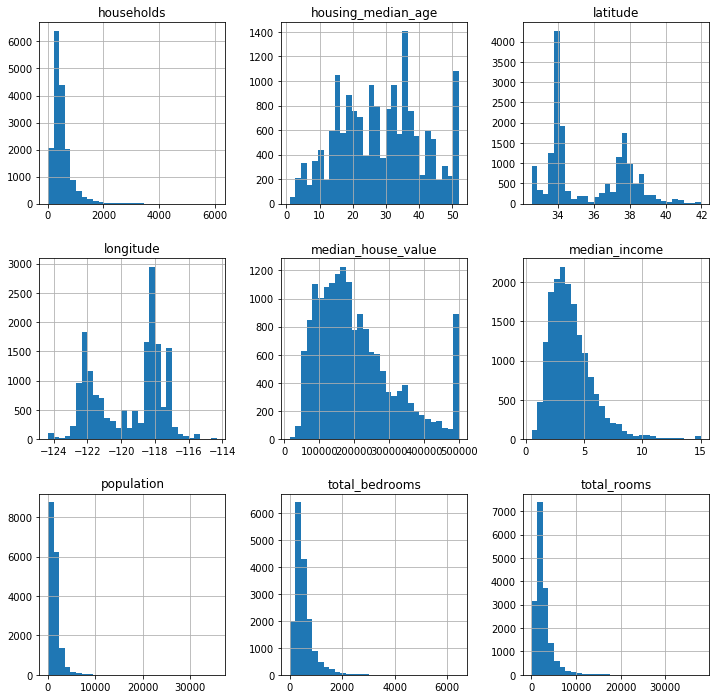

In [8]:
housing.hist(figsize=(12,12), bins=30)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
?train_test_split #Can load documentation like this; ?? prefix allows the code

In [11]:
train_set, test_set = train_test_split(housing, test_size=0.2)

In [12]:
print(housing.size)
print(train_set.size)
print(test_set.size)

153000
122400
30600


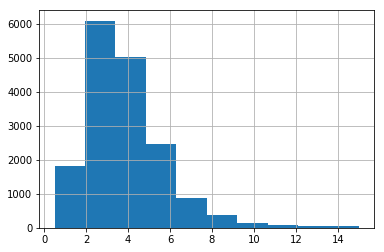

In [13]:
housing['median_income'].hist()

In [14]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)

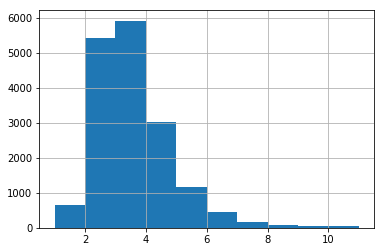

In [15]:
housing['income_cat'].hist()

In [16]:
housing['income_cat'].value_counts()

3.0     5919
2.0     5413
4.0     3029
5.0     1180
1.0      664
6.0      453
7.0      159
8.0       89
9.0       45
11.0      38
10.0      11
Name: income_cat, dtype: int64

In [17]:
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

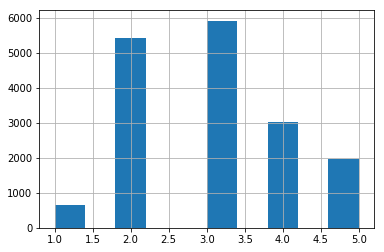

In [18]:
housing['income_cat'].hist()

## Stratified Shuffle Split Class

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

In [20]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

In [21]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    s_train_set = housing.loc[train_index]
    s_test_set = housing.loc[test_index]

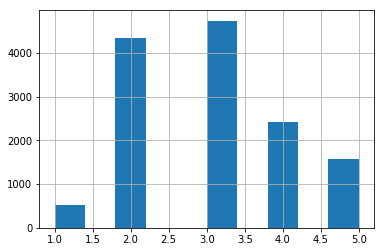

In [22]:
s_train_set['income_cat'].hist()

In [23]:
housing = s_train_set.copy()

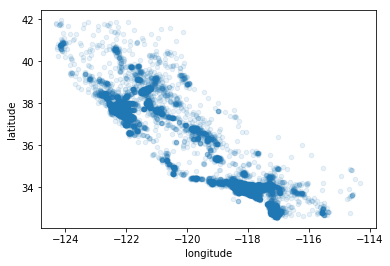

In [24]:
# Alpha value causes the data to be transparent and can easily see hotspots
housing.plot(kind='scatter', x='longitude',y='latitude', alpha=0.1)

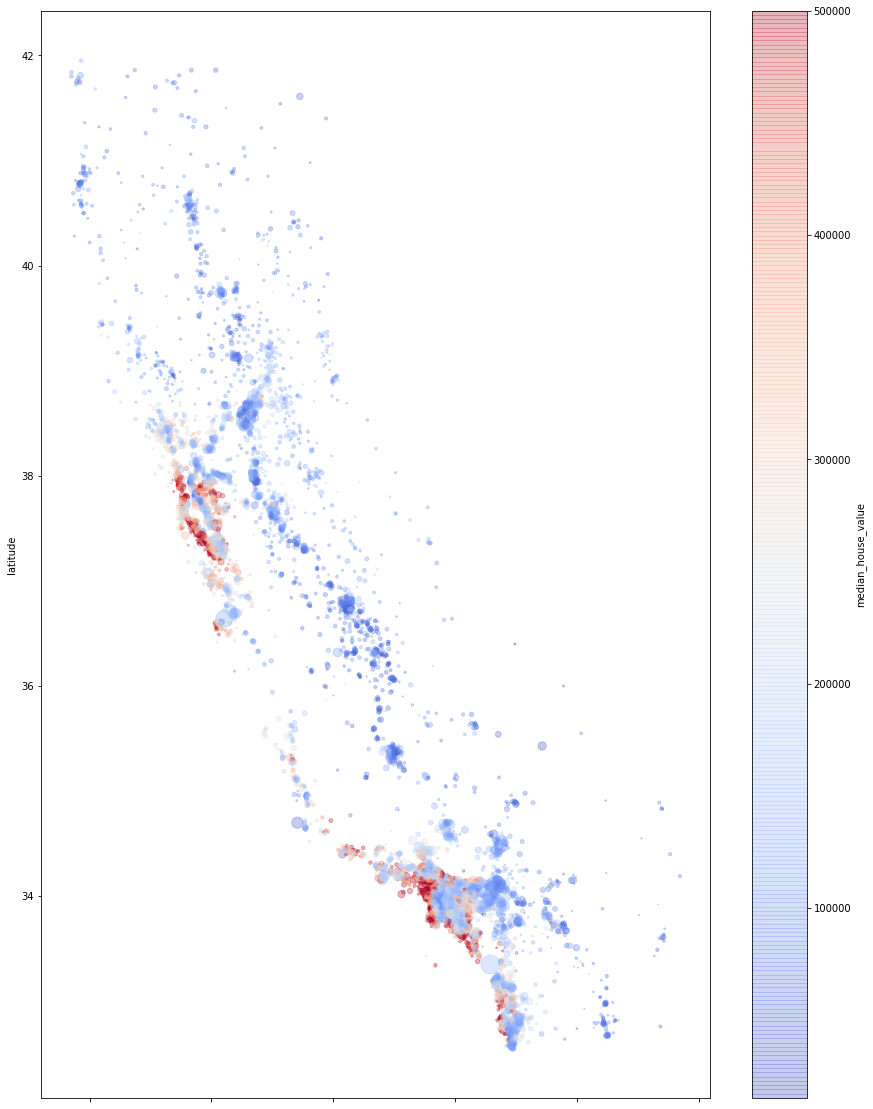

In [25]:
housing.plot(kind='scatter', x='longitude',y='latitude',alpha=0.3, s=housing['population']/100, c='median_house_value', figsize=(15,20), cmap=plt.get_cmap('coolwarm'),colorbar=True)

In [26]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
longitude,1.000000,-0.925576,-0.113037,0.046214,0.069407,0.101492,0.058488,-0.012016,-0.042610,-0.004128
latitude,-0.925576,1.000000,0.014405,-0.036456,-0.065962,-0.109383,-0.072225,-0.082774,-0.145939,-0.091030
housing_median_age,-0.113037,0.014405,1.000000,-0.366086,-0.324974,-0.298543,-0.308257,-0.114462,0.104776,-0.142486
total_rooms,0.046214,-0.036456,-0.366086,1.000000,0.929313,0.857285,0.919428,0.194792,0.131245,0.216779
total_bedrooms,0.069407,-0.065962,-0.324974,0.929313,1.000000,0.878894,0.981307,-0.012432,0.046394,0.010866
population,0.101492,-0.109383,-0.298543,0.857285,0.878894,1.000000,0.906670,-0.001787,-0.029261,0.019907
households,0.058488,-0.072225,-0.308257,0.919428,0.981307,0.906670,1.000000,0.008293,0.060683,0.034325
median_income,-0.012016,-0.082774,-0.114462,0.194792,-0.012432,-0.001787,0.008293,1.000000,0.695260,0.902158
median_house_value,-0.042610,-0.145939,0.104776,0.131245,0.046394,-0.029261,0.060683,0.695260,1.000000,0.651416
income_cat,-0.004128,-0.091030,-0.142486,0.216779,0.010866,0.019907,0.034325,0.902158,0.651416,1.000000


## Scatter plot of correlation matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002721FDE2E80>,
      dtype=object)

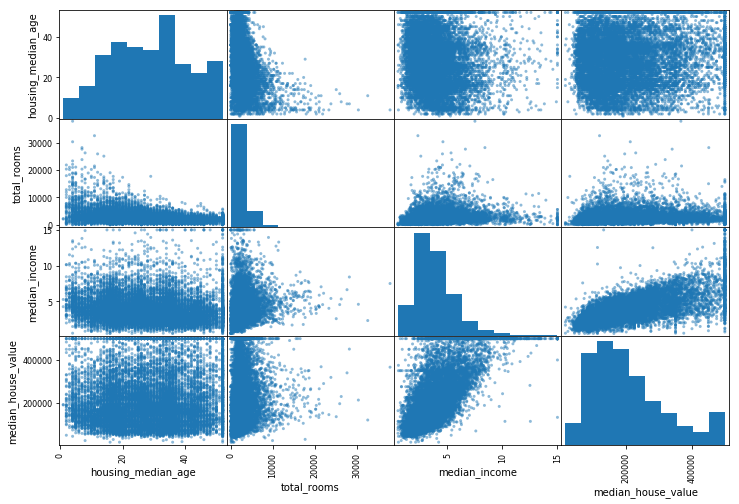

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[['housing_median_age', 'total_rooms', 'median_income','median_house_value']],figsize=(12,8))

# Data Processing

In [28]:
# Because the data is modified before, this resets the data
housing = s_train_set.copy()

In [29]:
housing.drop('median_house_value', axis=1, inplace=True)

In [30]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
12297,-121.49,38.50,32.0,2364.0,439.0,1331.0,449.0,3.3190,3.0
13772,-122.01,37.94,26.0,1619.0,224.0,706.0,220.0,6.0704,5.0
13328,-121.92,36.62,52.0,728.0,161.0,313.0,142.0,3.4327,3.0
1105,-117.11,32.67,46.0,928.0,236.0,790.0,235.0,1.6806,2.0
7631,-118.37,34.05,35.0,2457.0,552.0,1159.0,523.0,3.0862,3.0


In [31]:
housing_labels = s_train_set['median_house_value'].copy()

In [32]:
housing_labels.tail()

12297     84500.0
13772    268000.0
13328    254500.0
1105      92500.0
7631     345300.0
Name: median_house_value, dtype: float64

In [33]:
# There is no incomplete data in this dataset...
incomplete_rows = housing[housing.isnull().any(axis=1)]

In [34]:
# Remove all rows with null values in subset
# Rows aren't actually changed cause inplace=False
incomplete_rows.dropna(subset=['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat


In [35]:
incomplete_rows.drop('total_bedrooms', axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,income_cat


In [36]:
# Fills all Null values with Median
incomplete_rows.fillna(housing['total_bedrooms'].median(), inplace=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat


## Preprocessing Pipeline

In [37]:
# Deprecated soon and replaced with below
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

In [38]:
imputer = SimpleImputer(strategy='median')

In [39]:
# remove non numberical data
# numerical_housing = housing.drop('ocean_proximity', axis=1)
numerical_housing = housing

In [40]:
imputer.fit(numerical_housing)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [41]:
imputer.statistics_

array([-118.48  ,   34.24  ,   29.    , 2127.5   ,  434.    , 1166.    ,
        409.    ,    3.5481,    3.    ])

In [42]:
numerical_housing.median().values

array([-118.48  ,   34.24  ,   29.    , 2127.5   ,  434.    , 1166.    ,
        409.    ,    3.5481,    3.    ])

In [43]:
X = imputer.transform(numerical_housing)

In [44]:
transformed_housing = pd.DataFrame(X, columns=numerical_housing.columns, index = list(housing.index.values))

In [45]:
transformed_housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
12297,-121.49,38.50,32.0,2364.0,439.0,1331.0,449.0,3.3190,3.0
13772,-122.01,37.94,26.0,1619.0,224.0,706.0,220.0,6.0704,5.0
13328,-121.92,36.62,52.0,728.0,161.0,313.0,142.0,3.4327,3.0
1105,-117.11,32.67,46.0,928.0,236.0,790.0,235.0,1.6806,2.0
7631,-118.37,34.05,35.0,2457.0,552.0,1159.0,523.0,3.0862,3.0


In [46]:
# Alternative method (rather than fit -> transform)
X = imputer.fit_transform(numerical_housing)

In [47]:
transformed_housing.loc[incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat


## String Preprocessing

In [48]:
# Rather than a series, work as a dataframe
# housing_cat = housing[['ocean_proximity']]

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le = LabelEncoder()

In [51]:
# Fit and Transform the model
# le_encoded_housing_cat = le.fit_transform(housing_cat)

# Prints out an array of names
#le.classes_

In [52]:
# Able to take the Label and Binarizes it
# from sklearn.preprocessing import LabelBinarizer

## Custom Encoders (Pipeline)

In [53]:
from sklearn.base import BaseEstimator, TransformerMixin

In [54]:
rooms_i, bedrooms_i, population_i, household_i = 3, 4, 5, 6

In [55]:
class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_i] / X[:, household_i]
        population_per_household = X[:, population_i] / X[:, household_i]
        if self.add_bedrooms_per_room:
            bedrooms_per_household = X[:, bedrooms_i] / X[:, household_i]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_household]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [56]:
custom_features = CustomTransformer(add_bedrooms_per_room=False)

In [57]:
housing_with_custom_features = custom_features.transform(housing.values)

In [58]:
housing_with_custom_features

array([[-118.33      ,   34.17      ,   48.        , ...,    3.        ,
           5.62962963,    2.43572985],
       [-117.33      ,   34.13      ,   18.        , ...,    2.        ,
           4.5660091 ,    3.51593323],
       [-118.39      ,   34.09      ,   28.        , ...,    3.        ,
           4.28284672,    1.43248175],
       ...,
       [-121.92      ,   36.62      ,   52.        , ...,    3.        ,
           5.12676056,    2.20422535],
       [-117.11      ,   32.67      ,   46.        , ...,    2.        ,
           3.94893617,    3.36170213],
       [-118.37      ,   34.05      ,   35.        , ...,    3.        ,
           4.69789675,    2.21606119]])

In [59]:
housing_with_custom_columns_df = pd.DataFrame(housing_with_custom_features, columns = list((housing.columns)) + ['rooms_per_household', 'population_per_household'])

In [60]:
housing_with_custom_columns_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,rooms_per_household,population_per_household
0,-118.33,34.17,48.0,2584.0,483.0,1118.0,459.0,4.2396,3.0,5.629630,2.435730
1,-117.33,34.13,18.0,3009.0,740.0,2317.0,659.0,1.6375,2.0,4.566009,3.515933
2,-118.39,34.09,28.0,2347.0,608.0,785.0,548.0,4.4167,3.0,4.282847,1.432482
3,-122.22,38.15,7.0,5129.0,820.0,2824.0,738.0,5.5138,4.0,6.949864,3.826558
4,-118.32,33.98,49.0,1412.0,333.0,901.0,328.0,1.7067,2.0,4.304878,2.746951


# Numerical Pipeline

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [62]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('custom_transformer', CustomTransformer()),
    ('std_scaler', StandardScaler())
])

housing_num = num_pipeline.fit_transform(numerical_housing)

In [63]:
housing_num

array([[ 0.61185613, -0.67649334,  1.53693744, ...,  0.09910783,
        -0.12160971, -0.11226168],
       [ 1.11089379, -0.69517299, -0.84484332, ..., -0.41356194,
         0.11918693,  0.07798922],
       [ 0.58191387, -0.71385265, -0.0509164 , ..., -0.55004746,
        -0.34525164,  0.04182665],
       ...,
       [-1.17968907,  0.46763556,  1.85450821, ..., -0.14327727,
        -0.1732162 ,  0.10732266],
       [ 1.22068208, -1.37698042,  1.37815205, ..., -0.71099381,
         0.08480606, -0.24165016],
       [ 0.59189463, -0.7325323 ,  0.50483244, ..., -0.34999152,
        -0.17057778, -0.10374461]])

In [64]:
class DataAttributeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attribute_names].values

In [65]:
num_attributes = list(numerical_housing)
cat_attributes = ['ocean_proximity'] # Doesn't exist for this example

In [66]:
num_pipeline = Pipeline([
    ('selector', DataAttributeSelector(num_attributes)),
    ('imputer', SimpleImputer(strategy='median')),
    ('custom_transformer', CustomTransformer()),
    ('std_scaler', StandardScaler())
])

In [67]:
#cat_pipeline = Pipeline([
#    ('selector', DataAttributeSelector(num_attributes)),
#    ('one_hot_encoder', OneHotEncoder(sparse=False))
#])

In [68]:
from sklearn.pipeline import FeatureUnion

In [69]:
housing_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    #('cat_pipeline', cat_pipeline)
])

In [70]:
housing_processed = num_pipeline.fit_transform(housing)

In [71]:
print(housing_processed.shape)
print(housing.shape)

(13600, 12)
(13600, 9)


# Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
lin_reg = LinearRegression()

In [74]:
lin_reg.fit(housing_processed, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
sample_data = housing.iloc[:10]

In [79]:
sample_labels = housing_labels[:10]

In [80]:
sample_processed_data = housing_pipeline.transform(sample_data)

In [81]:
lin_reg.predict(sample_processed_data)

array([252948.3455332 ,  64999.63904244, 281263.79682491, 225028.80727573,
       155978.55271778, 148938.66071783, 138333.22992729, 201908.05534802,
        86956.89712515, 251319.22259084])

In [83]:
list(sample_labels)

[245100.0,
 72400.0,
 425000.0,
 171100.0,
 118600.0,
 94900.0,
 104900.0,
 213300.0,
 129200.0,
 321300.0]

In [84]:
from sklearn.metrics import mean_squared_error

In [85]:
housing_predictions = lin_reg.predict(housing_processed)

In [87]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)
print(lin_mse)

4737906403.355253


In [88]:
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68832.451673286


## Decision Tree Regressor

In [89]:
from sklearn.tree import DecisionTreeRegressor

In [90]:
dtree_reg = DecisionTreeRegressor()

In [91]:
dtree_reg.fit(housing_processed, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [92]:
housing_predictions = dtree_reg.predict(housing_processed)
dtree_mse = mean_squared_error(housing_labels, housing_predictions)
dtree_rmse = np.sqrt(dtree_mse)
print(dtree_rmse)

0.0


In [93]:
from sklearn.model_selection import cross_val_score

In [97]:
# Cross Validation scores for Decision Tree Regression
scores = cross_val_score(dtree_reg, housing_processed, housing_labels, scoring='neg_mean_squared_error', cv=10)
dtree_rmse_scores = np.sqrt(-scores)
dtree_rmse_scores

array([77451.68375332, 77090.58500183, 71730.50781791, 67616.37829162,
       70937.1683545 , 73756.26593051, 76153.29866007, 75881.71719008,
       71911.52896843, 69443.24520504])

In [99]:
print(dtree_rmse_scores.mean())
print(dtree_rmse_scores.std())

73197.23791733055
3219.726880536193


In [98]:
# Cross Validation scores for Linear Regression
scores = cross_val_score(lin_reg, housing_processed, housing_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-scores)
lin_rmse_scores

array([ 66905.81023134,  74215.79823093,  69141.31699154,  69382.9693263 ,
       119504.11000842,  68458.80104908,  68352.40171804,  69659.75745028,
        69932.60080131,  69143.84702718])

In [100]:
print(lin_rmse_scores.mean())
print(lin_rmse_scores.std())

74469.74128344134
15117.140088619402


## Random Forest Regressor

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
rnd_forest_reg = RandomForestRegressor()

In [103]:
rnd_forest_reg.fit(housing_processed, housing_labels)

D:\ProgramData\Anaconda3\envs\TensorFlow-3.6\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [104]:
housing_predictions = rnd_forest_reg.predict(housing_processed)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

22726.339215622615


In [105]:
# Cross Validation scores for Linear Regression
scores = cross_val_score(rnd_forest_reg, housing_processed, housing_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-scores)
forest_rmse_scores

array([54503.54082294, 56943.64321419, 54885.02176213, 51630.69186311,
       50697.78636934, 53019.23749825, 54956.72521793, 52291.31023053,
       54698.97669004, 51377.94561376])

In [106]:
print(forest_rmse_scores.mean())
print(forest_rmse_scores.std())

53500.48792822238
1894.3479521226952
